In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')
IMG_SIZE = 224
BATCH = 32

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
training_data = ImageDataGenerator(rescale = 1./255, validation_split=0.2)
training_generator = training_data.flow_from_directory(
    '/content/drive/MyDrive/Internship /dataset_p/train',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH,
    class_mode = 'binary',
    subset = 'training'
)

Found 865 images belonging to 2 classes.


In [13]:
 validation_generator = training_data.flow_from_directory(
    '/content/drive/MyDrive/Internship /bt 2/brain_tumor_dataset',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH,
    class_mode='binary',
    subset='validation'
 )

Found 229 images belonging to 2 classes.


In [14]:
model = keras.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
])

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])



In [19]:
model.fit(training_generator, epochs=5, validation_data=validation_generator,
batch_size= BATCH)


Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.8052 - loss: 0.4590 - val_accuracy: 0.4367 - val_loss: 1.8759
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.8206 - loss: 0.4074 - val_accuracy: 0.4279 - val_loss: 2.3039
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.8281 - loss: 0.3791 - val_accuracy: 0.3755 - val_loss: 3.2081
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.8877 - loss: 0.2820 - val_accuracy: 0.3624 - val_loss: 4.3848
Epoch 5/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.9110 - loss: 0.2114 - val_accuracy: 0.3624 - val_loss: 4.6683


In [20]:
model.save('/content/drive/MyDrive/bt2/product.h5'),
print("Model Loaded")

Model Loaded


In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

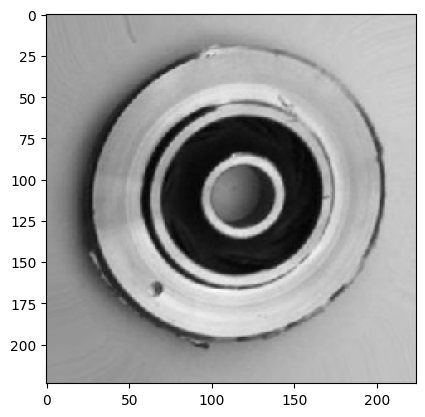

In [25]:
testpath="/content/drive/MyDrive/Internship /dataset_p/test/def_front/cast_def_0_235.jpeg"
img=image.load_img(testpath,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [26]:
 im_arr=image.img_to_array(img)
 im_arr=np.expand_dims(im_arr,axis=0)
 im_arr /= 255.

 fin = model.predict(im_arr)
 print(fin)

if fin >= 0.5:
    print("The product is good")
else:
    print("The product is defective ")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
[[0.00015996]]
The product is defective 
